# Presentation et Exploitation  des Données 

Dans ce chapitre nous allons exploités les données mise en notre disposition par les autorités de l'ULPGL.
Celles-ci sont issues du système d'information UAT (Univeristy Administrative Tool) et pour des raisons de confidentialité nous n'avons pas eu accès a toute la base des données nous avons juste fais une requete des donnes dont nous avons besoin pour notre étude et l'administrateur a executé une requete vers sa base des données et nous a fourni les données dont nous avions besoin pour l'etude sous forme d'un fichier csv (commat separted values).
Comme souligné dans le chapitre premier ce chapitre se basera sur la methodologie CRISP-DM elle sera subdivisé en differentes sections:
- L'exploration et la preparation des donnéés
- selection des algorithmes et leur execution 
- l'amelioratrion et optimisation des algorithmes
source : Sklean Handbook Appendix 2

## Exploration et la preparation des donness données 



source : https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
         SUNIL RAY , JANUARY 10, 2016

les specialites affirment que 70-80 % du temps consacré à un projet dataMining est alloué à la phase de l'exploration et la preparation des données , il n' ya pas des racourcis pour cette phase et si on l'a pas bien effectué nous risquons de nous retouver entrain d'ameliorer l'exactitude de notre algorithme mais en vain nous serons toujours obligées de retourner à cette phase et toutes ces techniques de l'exploration des données pourrons nous venir en aide .


1. Les Etapes de la phase d'exploration ét la preparation des donnes
Certaines des ces étapes sont mentionées sur la figure suivante ;
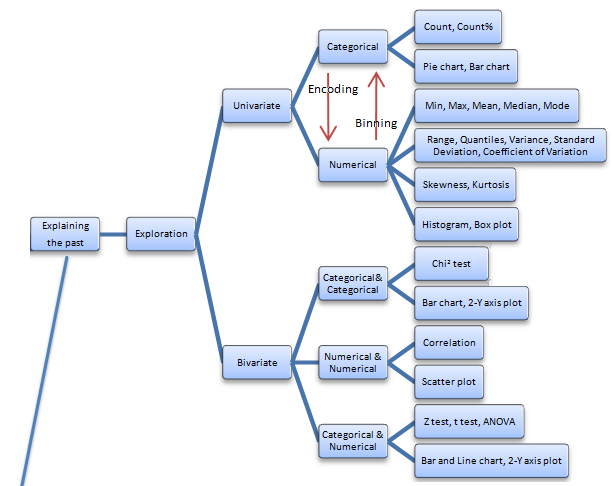
source: http://www.saedsayad.com/data_mining_map.htm

En bref l'exploration des données consiste à se plonger dans le passée pour prédire l'avenir .Souvenenons nous que la qualité de notre entré determine la qualité de notre sortie, ces phases  nous permettent  d'ameliorer la qualité de notre entré en vue d'avoir une bonne sortie.
Voici les étapes de cette phases:

- Identification des variables
- Analyse univarié
- Analyse Bi-varié
- Traitement des valeur maquantes 
- Traitement des deviations ou outliers 
- Transformation des variables
- creation des nouvelles variables

Comme nous l'avons soulignées dans le chapitre 1 ce processus est un processus iteratif et incremetale nous executerons cette phase 2 a 5 fois ou plus en vue d'avoir un bon modele

### Identification des Données et des Variables

Comme soulignées dans la phase d'introduction les données mise à notre disposition sont sous format csv et nous alons utilisé la librarie pandas de python pour faire l'analyse , nous utiliserons aussi d'autres libraies qui nous permetrons de faire les statistiques ainsi ques les visualisations :

voici le code pour charger le librairies.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for beatiful visualizations
%matplotlib inline 
import scipy.stats as scs #for statistics
import operator
from scipy.stats import chi2_contingency
import matplotlib.ticker as ticker

In [2]:
dataset=pd.read_csv("DatasetV2.csv")

Nous venons de charger les donnes et nous pouvons remarquer à quoi ils ressemblent

In [3]:
dataset.head(10)

,IDENTIFICATION,BIRTHDAY,NAME,DIPLOMDATE,DIPLOMTYPE,DIPLOMMENTION,DIPLOMPERCENTAGE,DIPLOMSECTION,DIPLOMOPTION,DIPLOMPLACE,...,SCHOOLCODE,SCHOOLSTATUS,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,OPT,PROM
0,45,1972-03-21,H,1994-09-29,inconnu,NaN,50.0,PEDAGOGIEQUE,PEDA GENERALE,KIN,...,INSTITUT MAENDELEO,inconnu,2013-2014,NaN,ASSIMILE AUX AJOURNES,NaN,NaN,Faculté de Psychologie et des Sciences de l'Éd...,Sciences de l'Éducation,L2
1,215,1978-09-07,F,NaN,DIPLÔME D'ETAT,NaN,58.0,SCIENTIFIQUE,MATH-PHYSIQUE,NaN,...,INSTITUT VUNGI,inconnu,2012-2013,NaN,ADMIS AU MEMOIRE,63.099998,SATISFACTION,Faculté de Droit,Droit Privé et Judiciaire,L2
2,343,1973-03-04,H,1999-11-15,DIPLÔME D'ETAT,NaN,54.0,SCIENTIFIQUE,MATH PHYSIQUE,KINSHASA,...,INSTITUT FARAJA,inconnu,2015-2016,NaN,ASSIMILE AUX AJOURNES,52.200001,AJOURNE,Faculté des Sciences Économiques et de Gestion,Tronc commun,G2
3,356,1978-03-02,H,1997-12-24,DIPLÔME D'ETAT DU RWANDA,NaN,60.0,ECONOMIE ET COMMERCE,ECONOMIE,GISENYI,...,ESISE/GISENYI,inconnu,2015-2016,NaN,ADMIS AU STAGE ET AU MEMOIRE,59.900002,SATISFACTION,Faculté des Sciences Économiques et de Gestion,Gestion des Entreprises,L2
4,398,1968-02-28,H,1990-07-02,DIPLÔME D'ETAT,NaN,60.0,SCIENTIFIQUE,MATH PHYSIQUE,KINSHASA,...,NaN,inconnu,2012-2013,65.099998,SATISFACTION,NaN,NaN,Faculté de Santé et Développement Communautaires,Santé et Développement Communautaires,L2
5,429,1973-01-11,H,NaN,DIPLÔME D'ETAT,NaN,0.0,TECHNIQUE,COMMERCIALE ET ADMINISTRATIVE,NaN,...,"C,S, UMOJA",inconnu,2013-2014,NaN,ASSIMILE AUX AJOURNES,NaN,AJOURNE,Faculté de Droit,Tronc commun,G1
6,474,1979-04-06,F,NaN,inconnu,NaN,0.0,inconnu,inconnu,NaN,...,INST. MAENDELEO,inconnu,2014-2015,NaN,ASSIMILE AUX AJOURNES,NaN,NaN,Faculté de Droit,Droit Privé et Judiciaire,G3
7,474,1979-04-06,F,NaN,inconnu,NaN,0.0,inconnu,inconnu,NaN,...,INST. MAENDELEO,inconnu,2015-2016,62.500000,SATISFACTION,NaN,NaN,Faculté de Droit,Droit Privé et Judiciaire,G3
8,526,1979-01-27,H,2001-04-30,DIPLÔME D'ETAT,NaN,51.0,PEDAGOGIEQUE,PEDA GENERALE,KINSHASA,...,NaN,inconnu,2012-2013,65.000000,SATISFACTION,NaN,NaN,Faculté de Santé et Développement Communautaires,Santé et Développement Communautaires,L2
9,644,1976-01-29,H,NaN,DIPLÔME D'ETAT,NaN,50.0,PEDAGOGIEQUE,PEDA GENERALE,NaN,...,INST. MPINGA,inconnu,2013-2014,60.400002,SATISFACTION,NaN,NaN,Faculté de Droit,Droit Privé et Judiciaire,L1


In [52]:
dataset.shape

(9606, 18)

Nous remarquons que les données sont stocké dans un e structure de type matricielle appelé dataframe.
source : https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe

un DataFrame  selon la documentation officielle de pandas  est une structure des données bidementionnel avec des colonnes des données des differentes types . Il peut etre compareé à une feuille de calcul excel ou une table dans SQL

la commande dataset.shape nous a permis de dire que notre emsemble d'apprentissage de  depart
comprend 9606 lignes et 22 colones !
Analysons de plus pret les colones 

In [6]:
dataset.columns

Index([u'IDENTIFICATION', u'BIRTHDAY', u'NAME', u'DIPLOMDATE', u'DIPLOMTYPE',
       u'DIPLOMMENTION', u'DIPLOMPERCENTAGE', u'DIPLOMSECTION',
       u'DIPLOMOPTION', u'DIPLOMPLACE', u'SCHOOL', u'SCHOOLPROVINCE',
       u'SCHOOLCODE', u'SCHOOLSTATUS', u'ACADYEAR', u'PERC1', u'MENT1',
       u'PERC2', u'MENT2', u'FAC', u'OPT', u'PROM'],
      dtype='object')

chaque ligne comprend les information d'un étudiant pour une année Academique

1 IDENTIFICATION : contient une identification unique et anonyme d'un étudiant  les noms et les matricules reeles des étudiants on éé cachées pour des raisons de confidentialites 

2 BIRTHDAY : contient la date de naissance de chaque étudiant

3 NAME : contient le sexe de chaque étudiant

4 DIPLOMDATE : L'anné d'optiention du diplome

5 DIPLOMTYPE : le type de diplome

6 DIPLOMMENTION : mention de diplome

7 DIPLOMPERCENTAGE: le pourcentage du diplome

8 DIPLOMSECTION: la section du diplome

9 DIPLOMOPTION : l'option

10 DIPLOMPLACE : l'endroit d'optention du diplome

11 SCHOOL : l'ecole de provenance

12 SCHOOLPROVINCE : la province de provenance

13 SCHOOLCODE : code de l'ecole

14 SCHOOLSTATUS : le status de l'ecole (privaté , publique , conventioneé ,..)

15 ACADYEAR  : l'annéé academique '

16 PERC1 : poucentage en premiere session

17 MENT1 : mention en premier session

18 PERC2 : pourcentage en seconde session

19 MENT2 : mention en seconde session

20 FAC : la faculté

21 OPT : l'option

22 PROM : la promotion

Comme nous pouvons le constater les colonnes 1-14 regrogent les informations que chaque étudiant donné à son instcription , ils constituerons nos variables d'entres
les restes seronts utilisées pour constituer notre variable de sortie

Nous l'avons aussi signales que chaque ligne comprend les information d'un étudiant pour une année academique .
Pour mener bien notre anyse nous alons grouper les information de chaque etudieant en une lignee 

In [5]:
inputCol=dataset.columns[0:14]

nos données seront groupé selons les variables d'entrees ensuites les donnés de sorties serot groupes selon une fonction d'aggregation predefinie 

Nous allons premierement faire une analyse univarié sur les données en entrees !

Avant la phase de traitement des donnés regardons notre ensemble pour enlever les colonnes sans informations consoiderables.

Nous avons ecrit une function qui nous donnes un pourcentrage des valeurs maquantes pour chaque collones et de prime à bord nous allons supprimer certaines colonnes qu
ne comportent pas des informations.


In [6]:
def percentageMissin(Dataset):
    """this function will return the percentage of missing values in a dataset """
    if isinstance(Dataset,pd.DataFrame):
        adict={} #a dictionary conatin keys columns names and values percentage of missin value in the columns
        for col in Dataset.columns:
            adict[col]=(np.count_nonzero(Dataset[col].isnull())*100)/len(Dataset[col])
        return pd.DataFrame(adict,index=['% of missing'],columns=adict.keys())
    else:
        raise TypeError("can only be used with panda dataframe")

In [8]:
MissinValueTables=percentageMissin(dataset)

In [9]:
MissinValueTables.loc['% of missing']

BIRTHDAY             0
DIPLOMDATE          98
DIPLOMPLACE         98
SCHOOLSTATUS         0
DIPLOMPERCENTAGE     0
SCHOOLPROVINCE       0
FAC                  0
ACADYEAR             0
DIPLOMMENTION       99
SCHOOLCODE          70
PERC1               55
PERC2               36
DIPLOMOPTION         0
OPT                  0
SCHOOL               5
NAME                 0
DIPLOMSECTION        0
MENT1                0
PROM                 0
MENT2               24
IDENTIFICATION       0
DIPLOMTYPE           0
Name: % of missing, dtype: int64

In [9]:
MissinValueTables

,BIRTHDAY,DIPLOMDATE,DIPLOMPLACE,SCHOOLSTATUS,DIPLOMPERCENTAGE,SCHOOLPROVINCE,FAC,ACADYEAR,DIPLOMMENTION,SCHOOLCODE,...,DIPLOMOPTION,OPT,SCHOOL,NAME,DIPLOMSECTION,MENT1,PROM,MENT2,IDENTIFICATION,DIPLOMTYPE
% of missing,0,98,98,0,0,0,0,0,99,70,...,0,0,5,0,0,0,0,24,0,0


Avec cette table nous remarquons que 4 colones ne nous servirons à riens dans la suite car elles disposent de plus de 70 % des valeurs maquantes et nous devons les suprimées avant de continuer notre analyse 

In [10]:
ColWIthoutInfo=['DIPLOMDATE','DIPLOMMENTION','DIPLOMPLACE','SCHOOLCODE']
dataset.drop(labels=ColWIthoutInfo,axis=1,inplace=True)

In [11]:
dataset.head(5)

,IDENTIFICATION,BIRTHDAY,NAME,DIPLOMTYPE,DIPLOMPERCENTAGE,DIPLOMSECTION,DIPLOMOPTION,SCHOOL,SCHOOLPROVINCE,SCHOOLSTATUS,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,OPT,PROM
0,45,1972-03-21,H,inconnu,50.0,PEDAGOGIEQUE,PEDA GENERALE,INSTITUT MAENDELEO,NORD-KIVU,inconnu,2013-2014,NaN,ASSIMILE AUX AJOURNES,NaN,NaN,Faculté de Psychologie et des Sciences de l'Éd...,Sciences de l'Éducation,L2
1,215,1978-09-07,F,DIPLÔME D'ETAT,58.0,SCIENTIFIQUE,MATH-PHYSIQUE,INSTITUT VUNGI,NORD-KIVU,inconnu,2012-2013,NaN,ADMIS AU MEMOIRE,63.099998,SATISFACTION,Faculté de Droit,Droit Privé et Judiciaire,L2
2,343,1973-03-04,H,DIPLÔME D'ETAT,54.0,SCIENTIFIQUE,MATH PHYSIQUE,INSTITUT FARAJA,NORD-KIVU,inconnu,2015-2016,NaN,ASSIMILE AUX AJOURNES,52.200001,AJOURNE,Faculté des Sciences Économiques et de Gestion,Tronc commun,G2
3,356,1978-03-02,H,DIPLÔME D'ETAT DU RWANDA,60.0,ECONOMIE ET COMMERCE,ECONOMIE,ESISE/GISENYI,inconnu,inconnu,2015-2016,NaN,ADMIS AU STAGE ET AU MEMOIRE,59.900002,SATISFACTION,Faculté des Sciences Économiques et de Gestion,Gestion des Entreprises,L2
4,398,1968-02-28,H,DIPLÔME D'ETAT,60.0,SCIENTIFIQUE,MATH PHYSIQUE,NaN,inconnu,inconnu,2012-2013,65.099998,SATISFACTION,NaN,NaN,Faculté de Santé et Développement Communautaires,Santé et Développement Communautaires,L2


Nous pouvons remarquer que notre ensemble d'apprentissage change de dimenssion et (7216,22) à (7216,18)

In [12]:
dataset.shape

(9606, 18)

In [13]:
dataset.columns

Index([u'IDENTIFICATION', u'BIRTHDAY', u'NAME', u'DIPLOMTYPE',
       u'DIPLOMPERCENTAGE', u'DIPLOMSECTION', u'DIPLOMOPTION', u'SCHOOL',
       u'SCHOOLPROVINCE', u'SCHOOLSTATUS', u'ACADYEAR', u'PERC1', u'MENT1',
       u'PERC2', u'MENT2', u'FAC', u'OPT', u'PROM'],
      dtype='object')

les colonnes en entrée deviennent les 10 premiers colonnes 

In [12]:
inCol=list(dataset.columns[0:10])

In [13]:
outCol=list(dataset.columns[10:])

Pour une premiere approche nous allons grouper notre ensemble en fonction des données en entré et ensuite  ecrire une functuion qui va groupper les donnes de sortie

In [14]:
dataset.shape

(9606, 18)

voici la function qui va groupper les données de sortie

In [15]:
def f(x):
    return pd.Series(dict(
     ACADYEAR=list(x['ACADYEAR']),
     MENT1=list(x['MENT1']),
     MENT2=list(x['MENT2']),
     PERC1=list(x['PERC1']),
     PERC2=list(x['PERC2']),
     FAC=reduce(lambda x:x, [x['FAC'].iloc[0]]),
     OPT=reduce(lambda x:x, [x['OPT'].iloc[0]]),
     PROM=list(x['PROM'])
    ))

In [16]:
datasetV1=dataset.groupby(inCol).apply(f)

In [17]:
datasetV1.shape

(4715, 8)

In [18]:
datasetV1.reset_index(inplace=True)

In [19]:
datasetV1.head(5)

,IDENTIFICATION,BIRTHDAY,NAME,DIPLOMTYPE,DIPLOMPERCENTAGE,DIPLOMSECTION,DIPLOMOPTION,SCHOOL,SCHOOLPROVINCE,SCHOOLSTATUS,ACADYEAR,FAC,MENT1,MENT2,OPT,PERC1,PERC2,PROM
0,45,1972-03-21,H,inconnu,50.0,PEDAGOGIEQUE,PEDA GENERALE,INSTITUT MAENDELEO,NORD-KIVU,inconnu,[2013-2014],Faculté de Psychologie et des Sciences de l'Éd...,[ASSIMILE AUX AJOURNES],[nan],Sciences de l'Éducation,[nan],[nan],[L2]
1,215,1978-09-07,F,DIPLÔME D'ETAT,58.0,SCIENTIFIQUE,MATH-PHYSIQUE,INSTITUT VUNGI,NORD-KIVU,inconnu,[2012-2013],Faculté de Droit,[ADMIS AU MEMOIRE],[SATISFACTION],Droit Privé et Judiciaire,[nan],[63.0999984741],[L2]
2,343,1973-03-04,H,DIPLÔME D'ETAT,54.0,SCIENTIFIQUE,MATH PHYSIQUE,INSTITUT FARAJA,NORD-KIVU,inconnu,[2015-2016],Faculté des Sciences Économiques et de Gestion,[ASSIMILE AUX AJOURNES],[AJOURNE],Tronc commun,[nan],[52.2000007629],[G2]
3,356,1978-03-02,H,DIPLÔME D'ETAT DU RWANDA,60.0,ECONOMIE ET COMMERCE,ECONOMIE,ESISE/GISENYI,inconnu,inconnu,[2015-2016],Faculté des Sciences Économiques et de Gestion,[ADMIS AU STAGE ET AU MEMOIRE],[SATISFACTION],Gestion des Entreprises,[nan],[59.9000015259],[L2]
4,429,1973-01-11,H,DIPLÔME D'ETAT,0.0,TECHNIQUE,COMMERCIALE ET ADMINISTRATIVE,"C,S, UMOJA",NORD-KIVU,inconnu,[2013-2014],Faculté de Droit,[ASSIMILE AUX AJOURNES],[AJOURNE],Tronc commun,[nan],[nan],[G1]


apres groupement en fonction des matricules nous venons de remarquer que notre ensemble comprend 4715 rows et  18 columns et c'est sera notre ensemble pour notre étude 

cette ensemble est subdivisé en variables d'entré et variables de sortie!

In [146]:
datasetIn=pd.DataFrame(datasetV1[inCol])

In [21]:
datasetIn.shape

(4715, 10)

In [22]:
datasetOut=pd.DataFrame(datasetV1[['IDENTIFICATION']+outCol])

In [31]:
datasetOut.head(5)

,IDENTIFICATION,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,OPT,PROM
0,45,[2013-2014],[nan],[ASSIMILE AUX AJOURNES],[nan],[nan],Faculté de Psychologie et des Sciences de l'Éd...,Sciences de l'Éducation,[L2]
1,215,[2012-2013],[nan],[ADMIS AU MEMOIRE],[63.0999984741],[SATISFACTION],Faculté de Droit,Droit Privé et Judiciaire,[L2]
2,343,[2015-2016],[nan],[ASSIMILE AUX AJOURNES],[52.2000007629],[AJOURNE],Faculté des Sciences Économiques et de Gestion,Tronc commun,[G2]
3,356,[2015-2016],[nan],[ADMIS AU STAGE ET AU MEMOIRE],[59.9000015259],[SATISFACTION],Faculté des Sciences Économiques et de Gestion,Gestion des Entreprises,[L2]
4,429,[2013-2014],[nan],[ASSIMILE AUX AJOURNES],[nan],[AJOURNE],Faculté de Droit,Tronc commun,[G1]


In [32]:
datasetIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 10 columns):
IDENTIFICATION      4715 non-null int64
BIRTHDAY            4715 non-null object
NAME                4715 non-null object
DIPLOMTYPE          4715 non-null object
DIPLOMPERCENTAGE    4715 non-null float64
DIPLOMSECTION       4715 non-null object
DIPLOMOPTION        4715 non-null object
SCHOOL              4715 non-null object
SCHOOLPROVINCE      4715 non-null object
SCHOOLSTATUS        4715 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 368.4+ KB


In [79]:
datasetOut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 9 columns):
IDENTIFICATION    4038 non-null int64
ACADYEAR          4038 non-null object
PERC1             4038 non-null object
MENT1             4038 non-null object
PERC2             4038 non-null object
MENT2             4038 non-null object
FAC               4038 non-null object
OPT               4038 non-null object
PROM              4038 non-null object
dtypes: int64(1), object(8)
memory usage: 284.0+ KB


Nous venons de finir avec la presentation des nos données nous allons maintenant debuter avec la phase d'analyse promremendite des donnés que nous avons en entré et ensuite nous fairons une analyse des données en sortie en enfin analyse les donnes des sortie combinées à celles des données ?

### Analyse des données

Cette phase comprend une analyse statistique bivarié et univarié nous visualiserons les résultat à l'aide des graphiques .
Dans cette partie nous utiliserons beaucoup plus la statistique descriptives et inferentielle.

Comme nous pous pouvons le remarquer notre ensemble d'apprentissage comprend à la fois des données numeriques (continues ) ainsi que des données discrètes categories.
voici comment nous allons procèder

#### Statistique Descriptive (Analyse Univarié)

1. variable Numériques ou continues :
Pour les données continues nous allons essayer de comprendre la tendence et la dispertion des nos variables .les metriques utilisées sont sur la figure suivante:

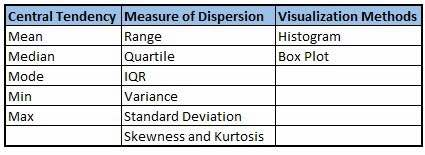
En bréf nous allons éxaminer le moyenne , le mode , l'ecart-type et la variance , nous conterons aussi les variables nous fairons les visualisations avec des boxplot!
cette étape nous sera aussi utile dans le traitement des valeur maquantes et des outliers!
2. variable categorielle ou quantitative
Pour les données discrètes nous aloons les tables des frequences pour comprendre la distrubution de chaque categorie nous pour aussi voir le pourcentage de chaque categorie , les histogrammes et bar chart seront utilisées. 


####  Statistique Descriptive : ANalyse Bivarié

Technique d'analyse statistique des données, consistant à découvrir les relations qui peuvent exister entre les variables prises deux par deux.
L'analyse bivariée utilise les mesures d'association entre deux variables à différents niveaux de mesure et les tests d'inférence pour des mesures observées sur deux groupes et sur plus de deux groupes.

Source: Becker, William. Uncertainty propagation through large nonlinear models. Diss. University of Sheffield, 2011.
de Smith, M. J. "STATSREF: Statistical Analysis Handbook-a web-based statistics." (2015).

Nous effecurons cette analyse à 3 niveau :
1. Variables Continues et categorielle ou quantitatives
Pour effectuer cette analyse nous utiliserons le test ANOVA (Analyse of variance):

 Si les deux variables sont liées, la variable quantitative aura des
moyennes significativement différentes sur chacun des groupes
définis par la variable qualitative.

 L’hypothèse H0 est du type :
Moyenne G1 = Moyenne G2 = Moyenne G3
Conditions d'application

 les populations étudiées suivent une distribution normale


 les variances des populations sont toutes égales (HOMOSCEDASTICITE)


 les échantillons   de tailles   sont prélevés aléatoirement et indépendamment dans les populations.

[formule et decision]
2. variable Categorielles et Cateorielles

Pour ces types des données nous allons effectué le test de chi carré:
Le chi carré est un test statistique conçu pour déterminer si la différence
entre deux distributions de fréquences est attribuable à l’erreur
d’échantillonnage (le hasard) ou est suffisamment grande pour être
statistiquement significative.

Ho - est, comme son nom l'indique, une hypothèse qui postule qu'il n'y a pas de différence entre les fréquences ou les proportions des deux groupes elle est considére comme hypothèse nulle.

Si la différence entre les deux distributions est réduite, l’hypothèse nulle
sera acceptée. Si la différence est grande, l’hypothèse nulle sera rejetée.
Dans ce dernier cas, on parlera d’une différence statistiquement
significative parce que l’écart entre les deux distributions est trop
important pour être expliqué par le hasard seulement : une différence
réelle existe donc.
[Inserrer la formule]

3. Variables Continues et Continues 

Pour les variables continues on utilise cherche la correlation et pour notre travail nous allons utilisée le coeficient de correlation de pearson:
Les coefficients de corrélation permettent de donner une mesure synthétique de l'intensité de la relation entre deux caractères et de son sens lorsque cette relation est monotone. Le coefficient de corrélation de Pearson permet d'analyser les relations linéaires et le coefficient de corrélation de Spearman les relations non-linéaires monotones. Il existe d'autres coefficients pour les relations non-linéaires et non-monotones.
 
Signalons que python dispose des mutiples librairies pour effectuer ces genres d'analyse.

Commencons par l'analyse des données univariés sur les variables d'entré

In [16]:
datasetIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 10 columns):
IDENTIFICATION      4038 non-null int64
BIRTHDAY            4038 non-null object
NAME                4038 non-null object
DIPLOMTYPE          4038 non-null object
DIPLOMPERCENTAGE    4038 non-null float64
DIPLOMSECTION       4038 non-null object
DIPLOMOPTION        4038 non-null object
SCHOOL              4038 non-null object
SCHOOLPROVINCE      4038 non-null object
SCHOOLSTATUS        4038 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 315.5+ KB


Nous remarquons que nous données en entré dispose des 10 colones avec variables quantitatives et qualitatives, 

###### 1. Variables continues
###### a. Attribue Date

Type: String

Pour nous faciliter la tache nous allons remplacer la date de naissance de chaque individu par son age a ce moment ci et ainsi obtenit un attribue continue de plus.

In [23]:
from datetime import date
datasetIn['BIRTHDAY'] = pd.to_datetime(datasetIn['BIRTHDAY'], format='%Y-%m-%d',errors='coerce')     #convert the time from string to date
datasetIn['BIRTHDAY']=datasetIn['BIRTHDAY'].apply(lambda x : date.today().year - x.year - ((date.today().month, date.today().day) < (x.month, x.day)))

Valeurs Maquantes : Oui , ils sont causées par des erreurs à l'entré

In [24]:
datasetIn['BIRTHDAY'].isnull().sum()

7

In [73]:
len(datasetIn)

4038

In [76]:
67/ 4038

0

Solution : Ils sont remplace par la moyenne comme leur proportion est insignifiant

In [25]:
datasetIn['BIRTHDAY']=datasetIn['BIRTHDAY'].fillna(np.mean(datasetIn['BIRTHDAY']))

In [26]:
datasetIn.describe()

,IDENTIFICATION,BIRTHDAY,DIPLOMPERCENTAGE
count,4715.000000,4715.000000,4715.000000
mean,8720.744221,24.704333,57.890774
std,2451.528838,4.617679,88.056789
min,45.000000,18.000000,0.000000
25%,7149.000000,22.000000,52.000000
50%,9172.000000,24.000000,56.000000
75%,10579.500000,26.000000,60.000000
max,12360.000000,59.000000,6053.000000


Ce tableau decrit toutes les informations possibles sur les données continues 
et de prime à bord nous sommes à mesure de constater certaines incoherences sur les diplome percentage qui on un maximun de 6053 et un minimum de 0 qui est vraiment impossible car le diplome en RDC doi etre compris entre 50 et 100 % !Nous allons visualisé ces inchoherence de plus prêt avec des boxplots.

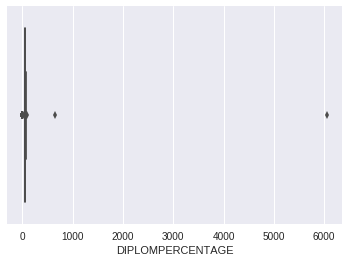

In [34]:
ax = sns.boxplot(x=datasetIn['DIPLOMPERCENTAGE'])

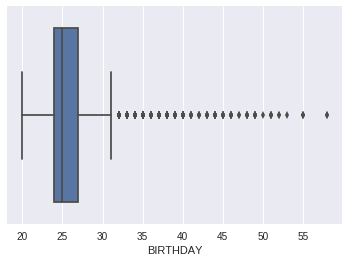

In [35]:
ax = sns.boxplot(x=datasetIn['BIRTHDAY'])

Au vu de ces courbes nous remarquons que l'attribue diplome percentage dispose de beaucoup des deviations.

Mais l'attribue Bithday a une distribution presque normale

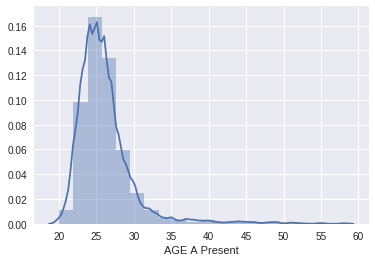

In [36]:
sns.distplot(datasetIn['BIRTHDAY'],bins=20,axlabel='AGE A Present',kde=1,norm_hist=0)

Nous pouvons facilement voir que l'age a une distribution presque normale.
NB: change norm hist to 1 to see count

regardons de plus pret celui du diplome percentage

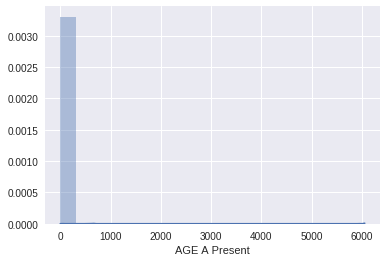

In [128]:
sns.distplot(datasetIn['DIPLOMPERCENTAGE'],bins=20,axlabel='AGE A Present',kde=1,norm_hist=0)

A cause des dispertions nous ne pouvons pas bien visualis la distribution.
essayons d'isoler les distibution pour voir de plus prét les données . 

In [98]:
len(datasetIn[~datasetIn.DIPLOMPERCENTAGE.isin(range(50,100) )])

34

Nous remarquons que nous avons 29 échantillons avec des valeur hors normes nous allons les normaliser dans la phase de préparation

##### Variables qualitatives ou categorieles

Pour chaque attriblue nous alons faire de count plot voir les diffrerents valeurs

In [35]:
colCat=list(datasetIn.select_dtypes(exclude=[np.number]).columns)

In [37]:
colCat

['BIRTHDAY',
 'NAME',
 'DIPLOMTYPE',
 'DIPLOMSECTION',
 'DIPLOMOPTION',
 'SCHOOL',
 'SCHOOLPROVINCE',
 'SCHOOLSTATUS']

In [39]:
datasetIn['NAME'].value_counts()

H    2771
F    1944
Name: NAME, dtype: int64

Nous pouvons remarqué facilement avec cete comande la repartition des sexes!

In [39]:
def plotCate(X,dataset,**kwargs):
    
    """this function will make a plot for categorical attribute"""
    n=kwargs.get('n') #number of value to plot
    if isinstance(dataset,pd.DataFrame) and isinstance(X,str) and X in dataset.columns :
        plt.figure(figsize= kwargs.get('size'))
        ax=sns.countplot(x=X, data=dataset,orient=kwargs.get('orient'),order=dataset[X].value_counts().sort_values(ascending=False).index[:n])
        plt.title('Distribution de '+ X )
        plt.xlabel(X)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        # Make twin axis
        #ax2=ax.twinx()
        # Switch so count axis is on right, frequency on left
        #ax2.yaxis.tick_left()
        #ax.yaxis.tick_right()
        #ax.yaxis.set_label_position('right')
        #ax2.yaxis.set_label_position('left')
        
        #ax2.set_ylabel('Poucentage [%]')
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('{:.3f} % soit : {:.3f}'.format(100.*y/len(dataset),y), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
        # Use a LinearLocator to ensure the correct number of ticks
        #ax.yaxis.set_major_locator(ticker.LinearLocator(11))

        # Fix the frequency range to 0-100
        #ax2.set_ylim(0,100)
        ax.set_ylim(0,len(dataset))

        # And use a MultipleLocator to ensure a tick spacing of 10
        #ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

        # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
        #ax2.grid(None)
        plt.savefig(X+'.png',dpi=100)
    else:
        raise TypeError('need only dataframe')

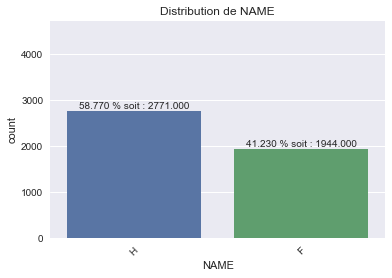

In [42]:
plotCate('NAME',datasetIn,size=(6,4))

Voici la repartition de sexes dans notre ensemble d'apprentissage on peut aisement constater qu'il n'est pas si desequilibré que ça!, le genre est vraiment respecté avec 41% dés nouveaux étudiant etant de sexe feminin.

###### Attribue : Diplome Type

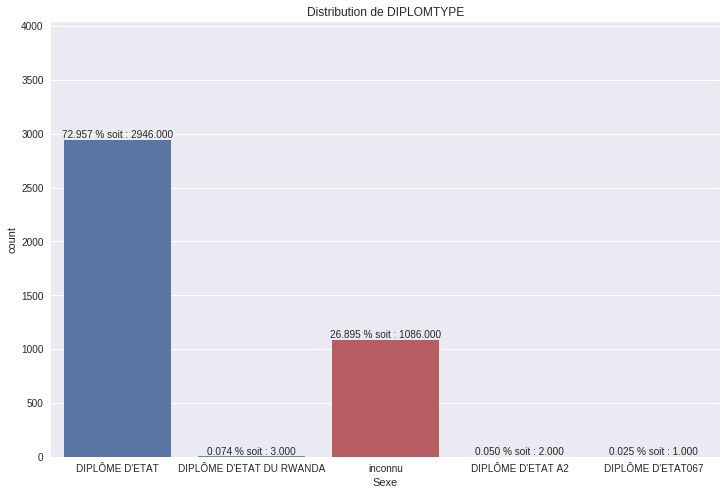

In [88]:
plotCate(colCat[1],datasetIn,size=(12,8),orient='h')

Nous pouvons remarquer que notre dataset contient plus de 70% d'element avec le diplome d'etat
et 26 avec un diplome type inconue nous allons traaiter cela à la suite et quelque echantillon avec des
diplomes du Rwanda et d'autre avec des anciens diplomes, les individus dont le diplomé type sont inconu serons consideré comme diplome d'etat, donc nous pouvons le remplacer par le diplome d'etat.

In [50]:
datasetIn.DIPLOMTYPE.value_counts()

DIPLÔME D'ETAT              4706
DIPLÔME D'ETAT A2              4
DIPLÔME D'ETAT DU RWANDA       4
DIPLÔME D'ETAT067              1
Name: DIPLOMTYPE, dtype: int64

In [49]:
datasetIn.DIPLOMTYPE.loc[datasetIn.DIPLOMTYPE =='inconnu']=datasetIn.DIPLOMTYPE[1]

In [110]:
plotCate(colCat[2],datasetIn,size=(12,8),orient='h')

NameError: name 'colCat' is not defined

###### Attribue Diplome option et Diplome Section

In [104]:
len(datasetIn[colCat[2]].value_counts())

90

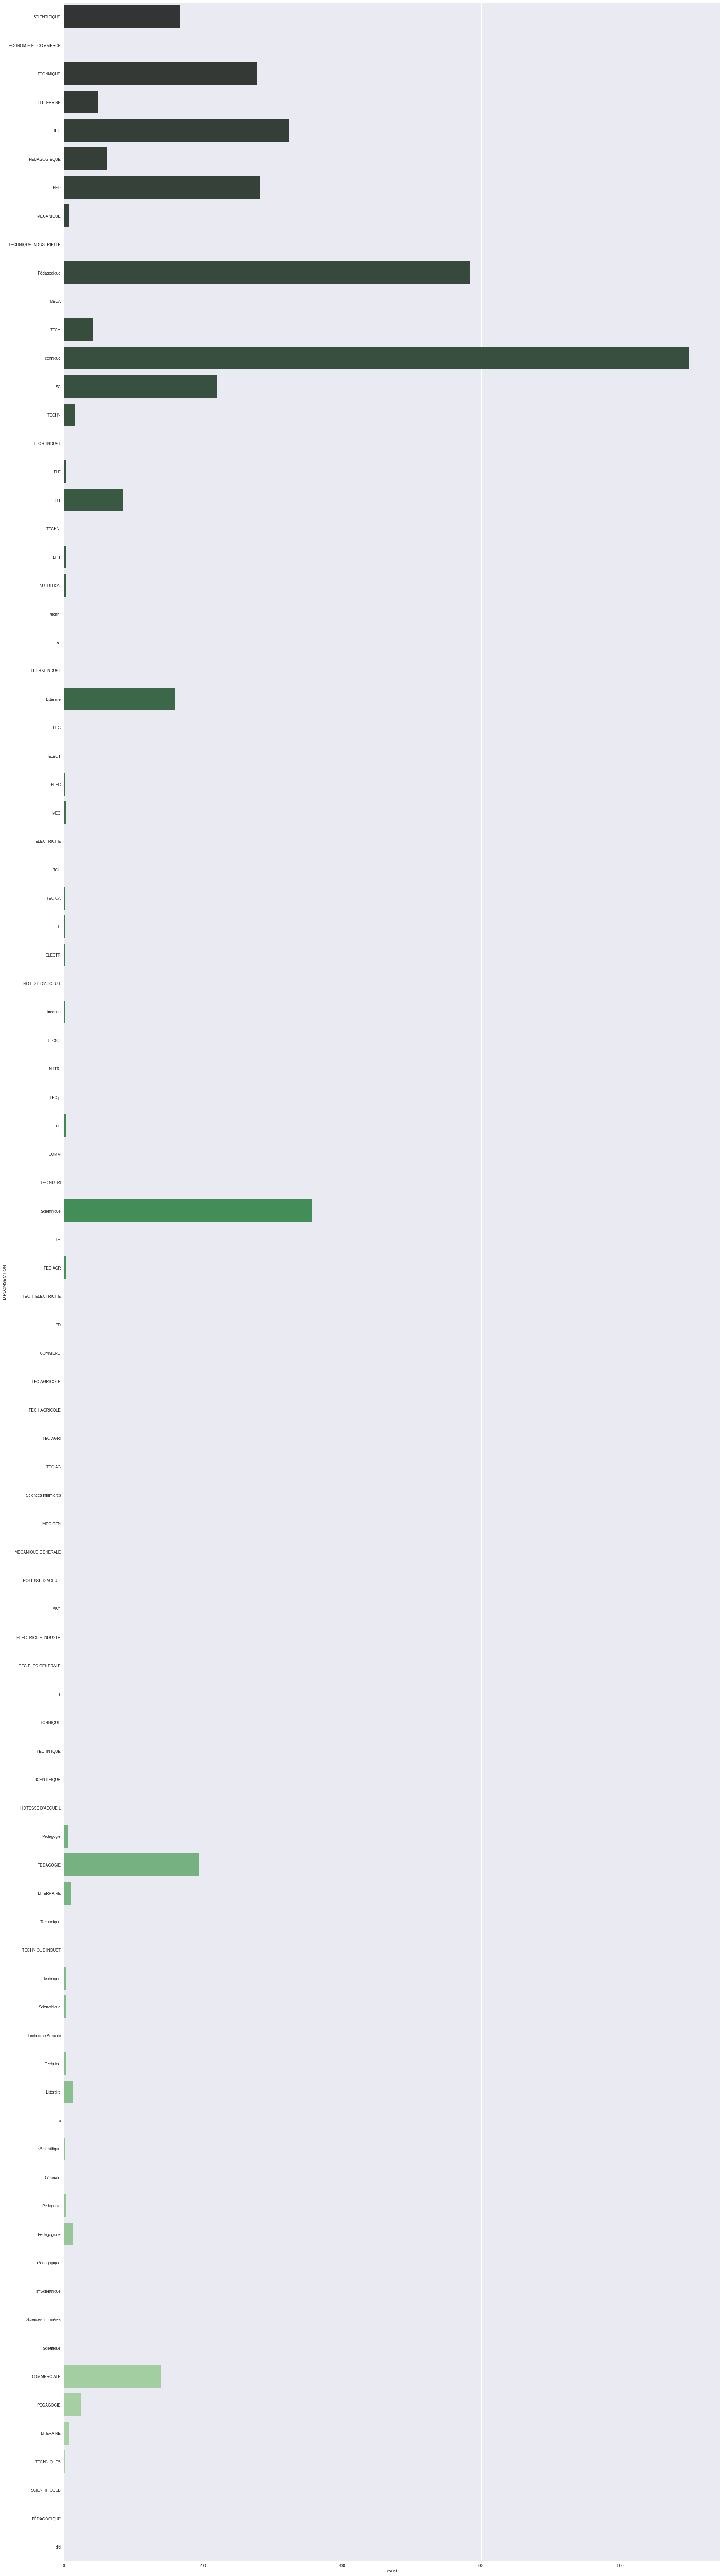

In [108]:
plt.figure(figsize=(30,120))
sns.countplot(y=colCat[2], data=datasetIn, palette="Greens_d")

Nous avons plus de 90 sections

In [110]:
datasetIn['DIPLOMOPTION'].value_counts()

Pédagogie Générale                           515
Sociale                                      342
PG                                           292
Commerciale et Administrative                271
SOCIALE                                      229
PEDAGOGIE GENERALE                           217
CA                                           210
BC                                           165
Commerciale Administrative                    98
Biologie Chimie                               92
LP                                            88
COMMERCIALE ET ADMINISTRATIVE                 78
Biologie chimie                               73
Pédagogie générale                            67
Latin Philo                                   63
BIO CHIMIE                                    59
Mathématique Physique                         58
MP                                            56
LATIN PHILO                                   55
Bio chimie                                    50
Biologie-Chimie     

une chose importante à remarquer au niveau des attribues 'DIPLOMOPTION' et 'DIPLOMSECTION' sont tres desorganisées il faut bien les oragniées dans la phase de préparation des données 

In [119]:
datasetIn.groupby(colCat[2])[colCat[3]].count()

DIPLOMSECTION
COMM                        1
COMMERC                     1
COMMERCIALE               140
ECONOMIE ET COMMERCE        1
ELE                         3
ELEC                        2
ELECT                       1
ELECTR                      2
ELECTRICITE                 1
ELECTRICITE INDUSTR         1
Générale                    1
HOTESE D'ACCEUIL            1
HOTESSE D ACEUIL            1
HOTESSE D'ACCUEIL           1
L                           1
LIT                        85
LITERAIRE                   8
LITERRAIRE                 10
LITT                        3
LITTERAIRE                 50
Litteraire                 13
Littéraire                160
MEC                         4
MEC GEN                     1
MECA                        1
MECANIQUE                   8
MECANIQUE GENERALE          1
NUTRI                       1
NUTRITION                   3
PD                          1
                         ... 
TEC NUTRI                   1
TEC µ                     

###### Attribue School Province

In [43]:
datasetIn.SCHOOLPROVINCE.value_counts()

NORD-KIVU           3688
SUD-KIVU             734
ORIENTALE             83
KINSHASA              70
MANIEMA               41
KATANGA               24
inconnu               24
BANDUNDU              12
KASAI ORIENTAL        10
N/K                    4
EQUATEUR               4
KASAI OCCIDENTAL       3
nk                     3
OUEST                  2
BAS CONGO              2
sk                     2
NORD KVU               2
NORD KVIU              2
KIGALI                 2
NYARUKENGE             1
K OR                   1
N K                    1
Name: SCHOOLPROVINCE, dtype: int64

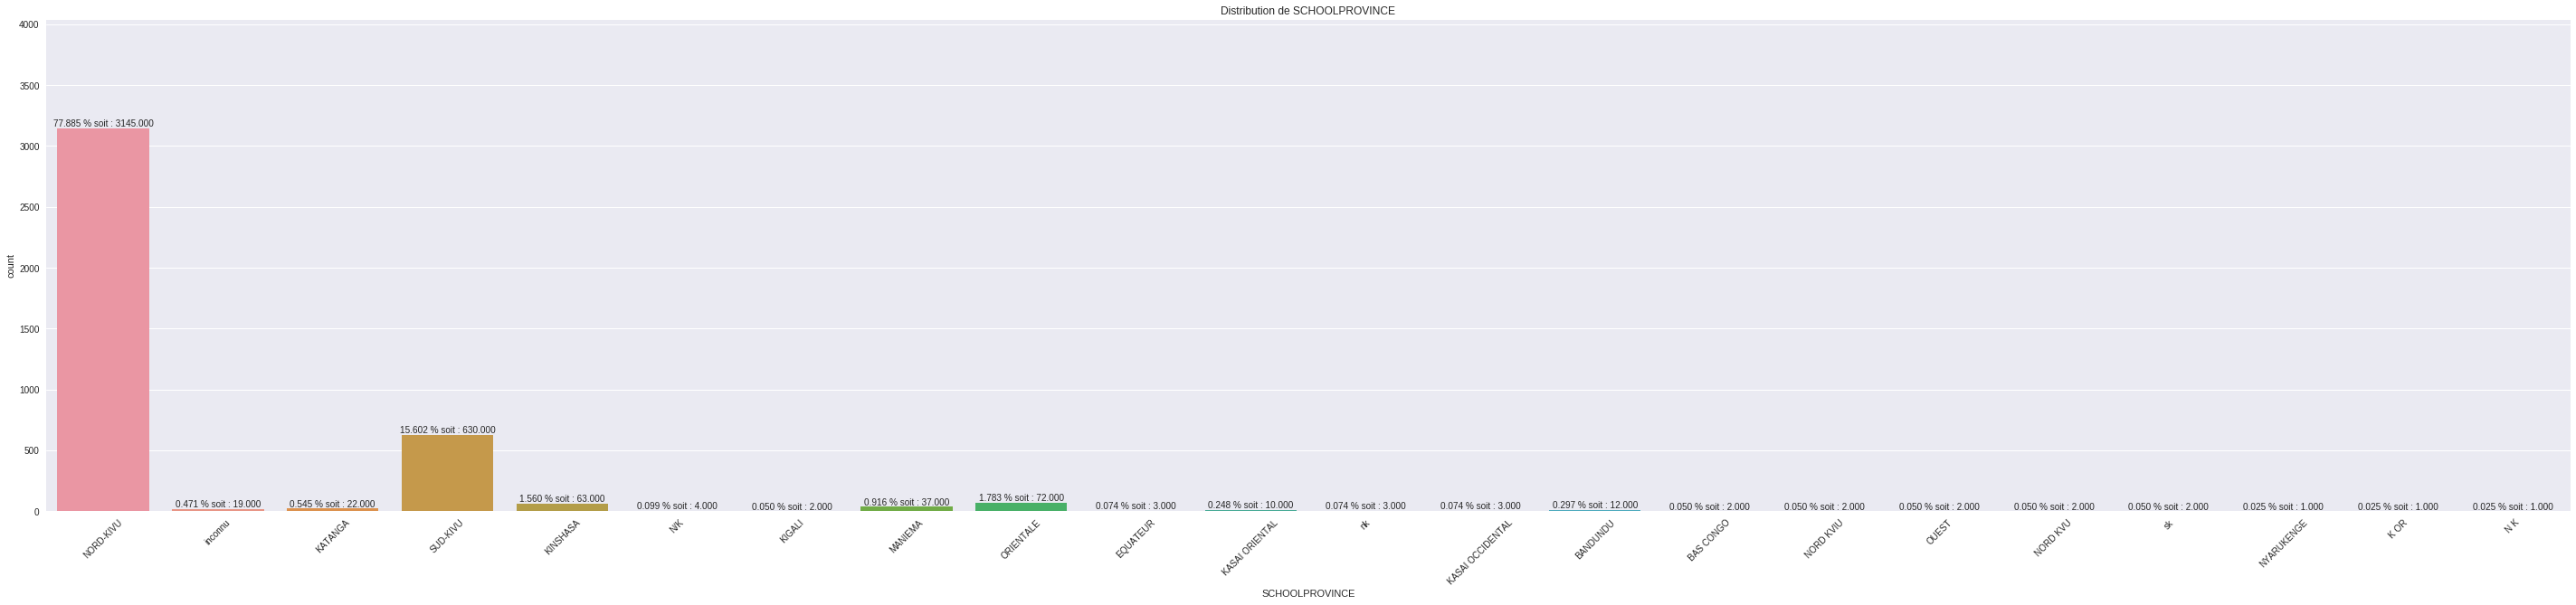

Avec cette image nous pouvons aisement constater que 63 % des étudaints de l'ulpgl proviennent de la province du nord kivu mais il ya une autre categorie qui provient du sud KIVu soit 15% 

###### Attribue SCHOOL ET SCHOOL STATUS

In [44]:
datasetIn.SCHOOL=datasetIn.SCHOOL.apply(lambda x: x.lower())

Pour une bonne visualisation on peut prealablement transformer les colones en minuscule

In [45]:
datasetIn.SCHOOL.value_counts()

metanoia                     228
mwanga                       223
maendeleo                     91
majengo                       76
faraja                        73
institut mwanga               69
isidore bakanja               66
itig                          62
kyeshero                      62
zanner                        61
institut metanoia             58
himbi                         56
mont carmel                   56
maranatha                     48
lycée sainte ursule           45
autodidacte                   43
lycée amani                   34
uzima                         31
mont goma                     31
moria                         29
goma                          28
lycée saint ursule            28
institut isidore bakanja      27
mama yetu                     27
icl                           27
bungulu                       26
alfajiri                      25
institut de goma              24
institut himbi                24
mikeno nc                     24
          

Nous avon un attribue avec 1285 categories differentes ...
Nous devons les analyser en details

In [46]:
datasetIn.SCHOOLSTATUS.value_counts()

inconnu         3833
catholique       289
protestant       260
privé            170
publique         152
musulman           6
kimbanguiste       3
autodidacte        2
Name: SCHOOLSTATUS, dtype: int64

In [159]:
datasetIn.loc[datasetIn.groupby('SCHOOLSTATUS').groups.get('inconnu')]['SCHOOL'].value_counts()

metanoia                           185
mwanga                             166
maendeleo                           87
faraja                              68
majengo                             67
isidore bakanja                     59
kyeshero                            59
itig                                51
zanner                              51
mont carmel                         49
himbi                               47
maranatha                           41
autodidacte                         37
lycée sainte ursule                 35
moria                               29
mont goma                           28
uzima                               27
goma                                26
mama yetu                           25
mikeno nc                           24
icl                                 24
bungulu                             22
saint joseph                        21
ibanda                              21
visoke                              20
alfajiri                 

ces attribues aussi necessite un nettoyage et une bonne reparation

In [160]:
datasetIn.loc[datasetIn.groupby('SCHOOLSTATUS').groups.get('catholique')]['SCHOOL'].value_counts()

institut mwanga                       28
lycée saint ursule                    20
institut isidore bakanja              11
institut saint marc                    8
lycée  anuarite                        6
institut mwanga/uvira                  6
iti goma                               5
institut saint michel                  5
lycée anuarite                         5
lycée amani                            4
institut uzima                         4
institut mont carmel                   4
institut kashofu                       3
institut bemba gombo                   3
institut avenir                        3
malkia wa mbingu                       2
institut mgr guido                     2
institut sebyera                       2
lycée butembo                          2
institut mgr  kataliko                 2
mwanga                                 2
institut luanga                        2
itfm bukavu                            2
institut saint joseph                  2
itig            

Nous allons creer une branches à part pour le traitement de ces valeurs pour les diplomes section et diplome option

In [47]:
inCol

['IDENTIFICATION',
 'BIRTHDAY',
 'NAME',
 'DIPLOMTYPE',
 'DIPLOMPERCENTAGE',
 'DIPLOMSECTION',
 'DIPLOMOPTION',
 'SCHOOL',
 'SCHOOLPROVINCE',
 'SCHOOLSTATUS']

les collones que nous allons traiter sont school ,schoolstatus, dilpomesection,diplomeoption

In [76]:
noisyCol=['IDENTIFICATION','DIPLOMSECTION','DIPLOMOPTION','SCHOOL','SCHOOLSTATUS']

In [77]:
datasetInNoisy=datasetIn[noisyCol]

In [78]:
datasetInNoisy.head(5)

,IDENTIFICATION,DIPLOMSECTION,DIPLOMOPTION,SCHOOL,SCHOOLSTATUS
0,45,PEDAGOGIEQUE,PEDA GENERALE,INSTITUT MAENDELEO,inconnu
1,215,SCIENTIFIQUE,MATH-PHYSIQUE,INSTITUT VUNGI,inconnu
2,343,SCIENTIFIQUE,MATH PHYSIQUE,INSTITUT FARAJA,inconnu
3,356,ECONOMIE ET COMMERCE,ECONOMIE,ESISE/GISENYI,inconnu
4,429,TECHNIQUE,COMMERCIALE ET ADMINISTRATIVE,"C,S, UMOJA",inconnu


Nous allons sauvergarder cet nouveau dataframe dans un fichier csv et creer une notebook à part pour le traitement et le raffinement de ces collones

In [79]:
datasetInNoisy.to_csv('noisyColumns.csv')

##### Nettoyage des attribues bruitées 

Nous avons pu remarquer dans la phase de precedante que certaines attribues ont des valeurs très desorganisées et vraiment dispersé et ce qui a une mauvaise influance sur le calcul de l'entropie et ainsi sur les algorithmes du Machine Learning .
Nous pouvons aisement constater que ce problèmes est du à des fautes d'orthographes commise lors de la phase de saisie des données et ainsi pour countinues nous devons essayer de corriger ces erreurs et bien organisé les données .
Voyons d'abord en chiffre comment cela se presente

###### Attribue Diplomes sections

In [42]:
len(datasetIn.DIPLOMSECTION.value_counts())

101

Avec cette commande nous remarquons que cette attribue dispose de 101 valeurs disctinctes qui c'es qui es impossible pour la valeur de diplome section

voyons un peu en details ce qui contient cette attribue

In [45]:
Section=list(set(datasetIn.DIPLOMSECTION))

In [46]:
Section[:15]

['Sciences infirmi\xc3\xa8res',
 'TECSC',
 'COMMERCIALEC',
 'LIT',
 'Techniqe',
 'TECHN IQUE',
 'MECANIQUE GENERALE',
 's=Scientifique',
 'technique',
 'P\xc3\xa9dagogie',
 'TCH',
 'SCIENTIFIQUEB',
 'ELECTRICITE INDUSTR',
 'ELECTR',
 'L']

Dans cette simple description nous remarquons que les valeurs on été mal saisi comme par example les valeurs suivantes :
'TECSC',   'Techniqe', 'TECHN IQUE',technique','TCH' qui sont saisie pour la meme et unique section 'techniques' mais avec differentes erreurs d'orthographe

cela n'est qu'un example des differentes valeurs mal orthographiées presente dans notre ensemble d'etude 

ce genre d'erreur de notation  à pour consequence le fait qu'il font augmenter l'entropie de nos colonnes et ainsi penalisent nos algoritmes surtout lorsqu'on travaille avec les arbres de décisions nous avons procéde à un nettoyage automatique qui a consisté en un groupement des valleurs proches en utilisant la distance de leveinstein :(source : leveinstein) et le cllustering par l'agorithme d'affinity propagation,et ainsi qu'un nettoyage manuelle pour arranger les données à la fin de cette phase nous avons obtenus des données moyenement propres et bien netoyer avec un entropie faibe.
Nous pouvons le remarquer dans l'ensemble d'apprentissager suivant que ces données sont bien grouper.

In [4]:
datasetInClean=pd.read_csv('DatasetInClean.csv')

In [5]:
datasetInClean.head(5)

,Unnamed: 0,IDENTIFICATION,DIPLOMSECTION,DIPLOMOPTION,SCHOOL,SCHOOLSTATUS,SCHOOL_CORRECT,SCHOOL_RIGHT,OPTION
0,161,3895.0,TECHN,ca,i zanner,protestant,zanner,zanner,commmerciale et adm
1,192,4048.0,TECH,ca,inst zanner,protestant,zanner,zanner,commmerciale et adm
2,233,4217.0,TEC,ca,zanner,protestant,zanner,zanner,commmerciale et adm
3,292,4347.0,TEC,ca,zanner,protestant,zanner,zanner,commmerciale et adm
4,330,4409.0,TEC,ca,zanner,protestant,zanner,zanner,commmerciale et adm


In [6]:
datasetInClean.SCHOOLSTATUS.value_counts()

protestant      1370
catholique      1305
publique         726
privé            536
autodidacte       44
musulman          38
kimbanguiste       5
Name: SCHOOLSTATUS, dtype: int64

In [7]:
datasetInClean.fillna('inconnu',inplace=True)

In [8]:
datasetInClean.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
datasetInClean.IDENTIFICATION=datasetInClean.IDENTIFICATION.round(0).astype(int)

In [10]:
datasetInClean.SCHOOLSTATUS.value_counts()

protestant      1370
catholique      1305
publique         726
inconnu          691
privé            536
autodidacte       44
musulman          38
kimbanguiste       5
Name: SCHOOLSTATUS, dtype: int64

Nous pouvons maintenant combinner cette ensemble avec notre ensemble d'apprentissage de départ et ainsi continuer nore anlyse univarié poour les collones avce des varaibles qualitatives

In [11]:
datasetInClean.rename(columns={'OPTION':'OPTION_RIGHT'},inplace=True)

In [161]:
datasetInClean=pd.merge(datasetIn,datasetInClean[['IDENTIFICATION','SCHOOL_RIGHT','OPTION_RIGHT','SCHOOLSTATUS']],on='IDENTIFICATION')

In [162]:
datasetInClean.SCHOOLSTATUS.value_counts()

protestant      1370
catholique      1305
publique         726
inconnu          691
privé            536
autodidacte       44
musulman          38
kimbanguiste       5
Name: SCHOOLSTATUS, dtype: int64

In [186]:
datasetInClean.drop('SCHOOLSTATUS',axis=1,inplace=True)

Nous allons enfin continuer avec notre anlyser univarié pour les attribues nouvellement nettoyer 

In [12]:
datasetInClean.loc[datasetInClean.IDENTIFICATION==3895]

,IDENTIFICATION,DIPLOMSECTION,DIPLOMOPTION,SCHOOL,SCHOOLSTATUS,SCHOOL_CORRECT,SCHOOL_RIGHT,OPTION_RIGHT
0,3895.0,TECHN,ca,i zanner,protestant,zanner,zanner,commmerciale et adm


##### Attribue SCHOOLSTATUS

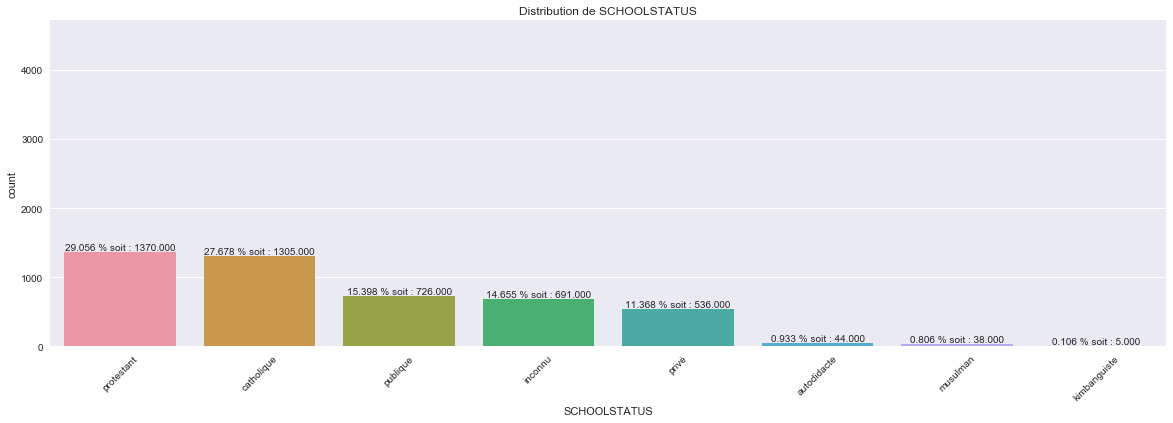

In [42]:
plotCate('SCHOOLSTATUS',datasetInClean,size=(20,6))

Dans cette figure nous pouvons remarquer aisement que 29% des étudiants proviennent des écoles dites protestantes , 27% viennent des écoles catholiques , 11% des écoles privé , 15 des écoles publiques
mais aussi il ya des étudiants venant des autodidactes , ceux provenant des écoles musulmanes et kibanguistes mais en proportion vraiment negligeable

##### Attribue OPTIONRIGHT

Nous allons maintenant nous attaquer à l'attribue option du diplome qui contient les valeurs de l'option du diplome de 'étudaint'

Essayons de voir de plus pret combien des valeur distinctes il dispose 

In [32]:
len(datasetInClean.OPTION_RIGHT.value_counts())

33

Nous pouvons aisement remarquer que les étudiants de notre étude proviennent des 33 écoles differentes 

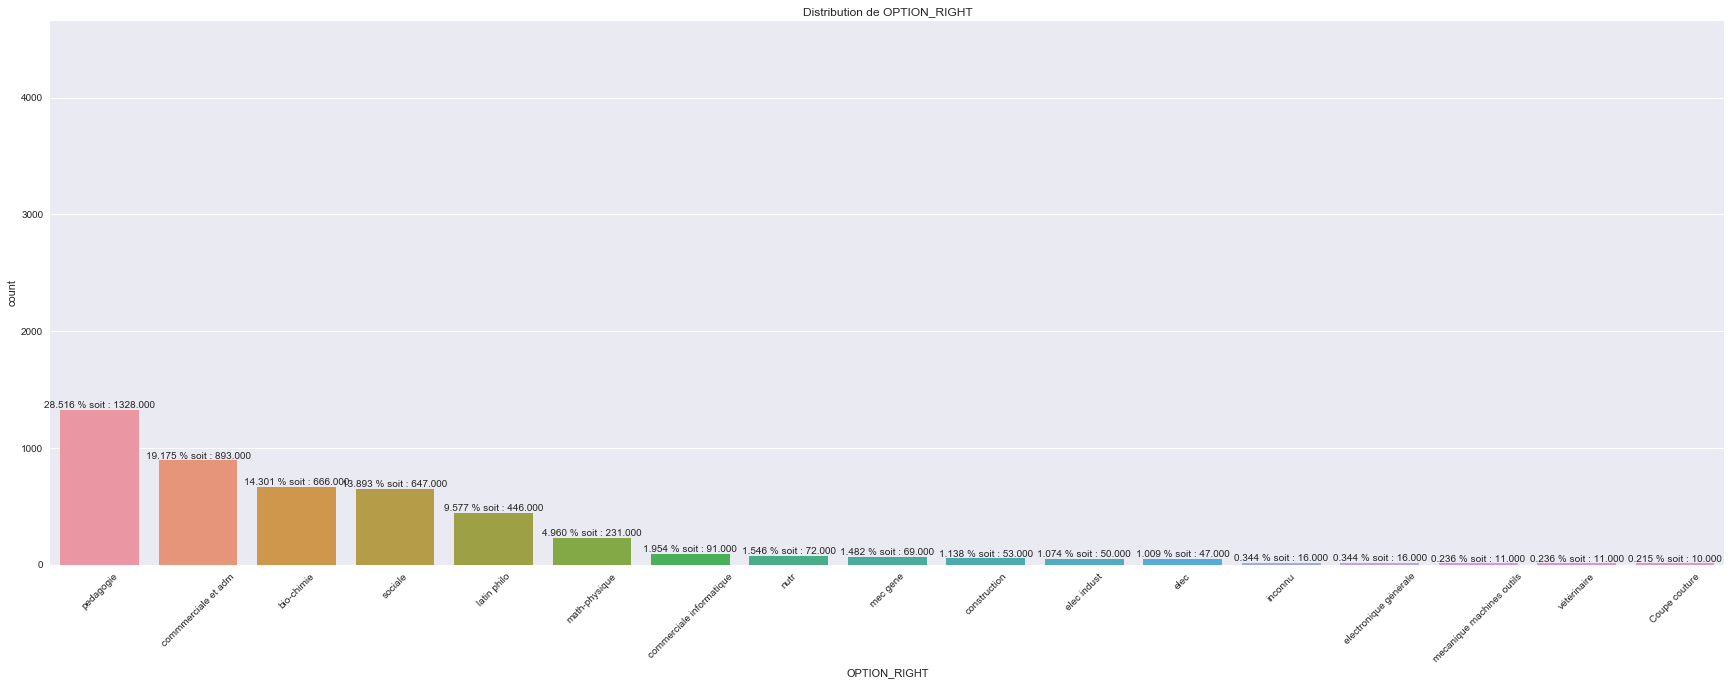

In [43]:
plotCate('OPTION_RIGHT',datasetInClean.loc[datasetInClean.OPTION_RIGHT.isin(datasetInClean.OPTION_RIGHT.value_counts()[:17].index) ],size=(30,10),n=17)

Dans cette figure nous pouvons remarquer que la majeure partie des étudiants de notre études proviennent de la section pedagogique avec enivoront 28% ensuite vienne la section commerciale et administrative avec 19% , suivent sociale avec 13%, scientifique bio-chimie avec 14 % ensuite viennent autres differentes options avec des valeurs inferieurs à 5%

In [12]:
datasetInClean.head(1)

,IDENTIFICATION,DIPLOMSECTION,DIPLOMOPTION,SCHOOL,SCHOOLSTATUS,SCHOOL_CORRECT,SCHOOL_RIGHT,OPTION_RIGHT
0,3895,TECHN,ca,i zanner,protestant,zanner,zanner,commmerciale et adm


##### Attribut School

cette attribue comprend les valeurs de l'ecole de provenance des nos finaliste combiné avec l'attribue school status il joue un role important dans notre étude.

voyons d'abord combien des valeurs differentes il comprend:

In [13]:
len(datasetInClean.SCHOOL_RIGHT.value_counts())

594

nous pouvons aisement remarquer que les eleves proviennent de 594 écoles differentes dans l'image qui va suivre  nous allons visulaise les écoles les plus representées

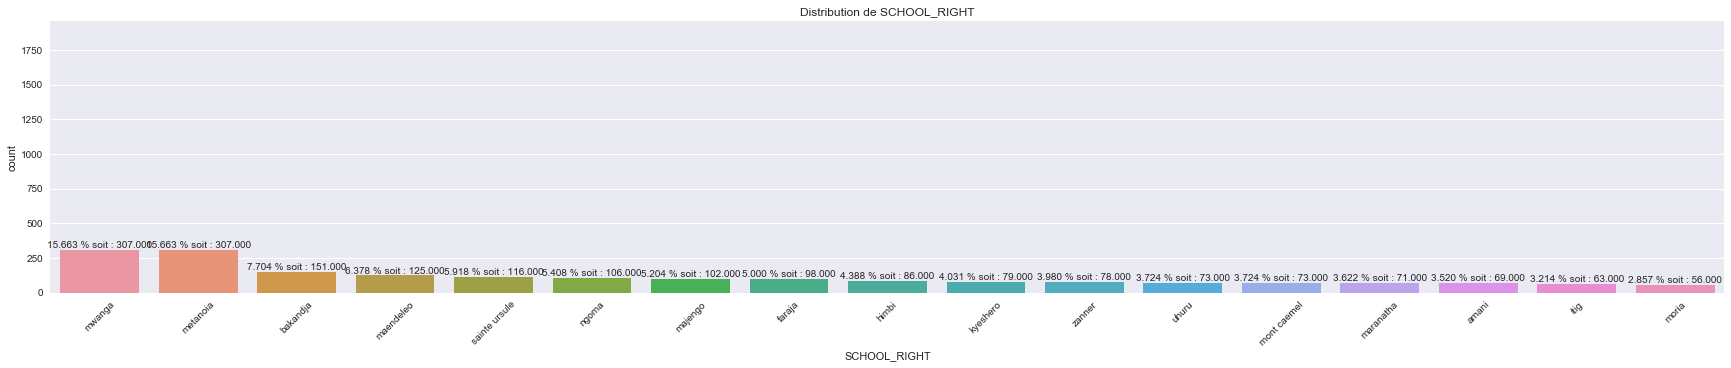

In [41]:
plotCate('SCHOOL_RIGHT',datasetInClean.loc[datasetInClean.SCHOOL_RIGHT.isin(datasetInClean.SCHOOL_RIGHT.value_counts()[:17].index) ],size=(30,5),n=17)

Nous pouvons remarquer aisement que le top 10 des école de provenance est constituer de grandes écoles de la ville de Goma avec l'insititut metanoia et le college mwanga en tete de liste avec 
l'institut mwanga et metanoia en tete de liste avec 15%  chacun ensuite vienne l'institut bakanja avec 6% ensuite vienne maendelo, le lycée sainte ursule et l'institut de Goma  avec 6%, 5% et 5 % respectivement et d'autres éecole se partagent le reste de 50%.

In [3]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [169]:
datasetInClean.info()